In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("Mall_Customers.csv")

km = KMeans(n_clusters=5)
predicted = km.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])
#print(predicted)

data['Cluster'] = predicted
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          4  
1          0  
2          4  
3          0  
4          4

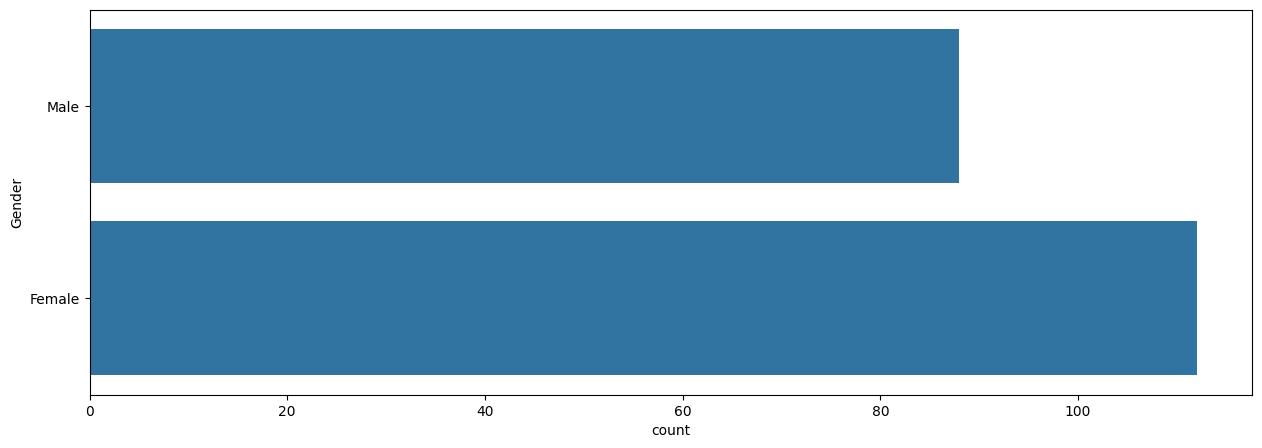

In [11]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = data)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

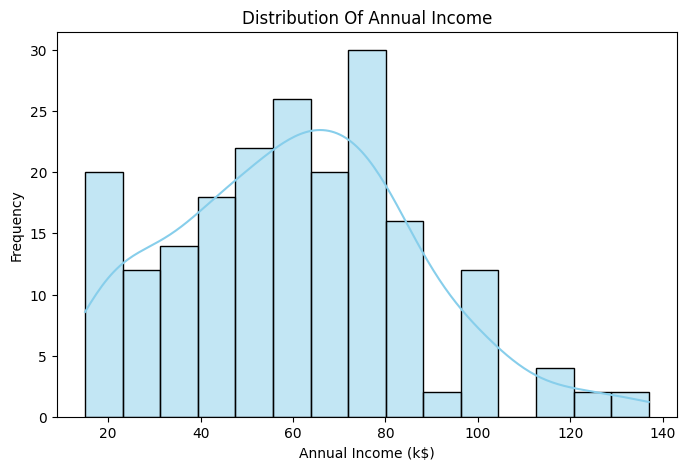

In [3]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Annual Income (k$)'], bins=15, kde=True, color='skyblue')
plt.title('Distribution Of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show

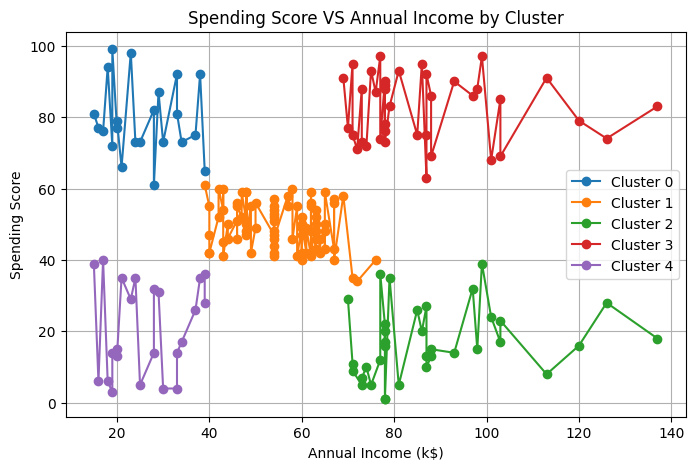

In [4]:
plt.figure(figsize=(8, 5))
for cluster in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster].sort_values('Annual Income (k$)')
    plt.plot(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
             label=f'Cluster {cluster}', marker='o')
plt.title('Spending Score VS Annual Income by Cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12332\3302626737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Annual Income (k$)', data=data, palette='Pastel2')


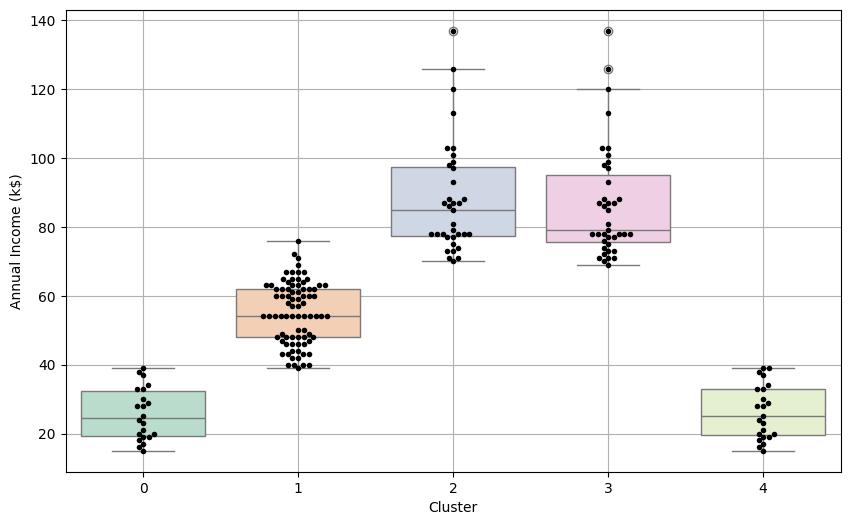

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=data, palette='Pastel2')
sns.swarmplot(x='Cluster', y='Annual Income (k$)', data=data, color='black', size=4)
plt.xlabel('Cluster')
plt.ylabel('Annual Income (k$)')
plt.grid(True)
plt.show()

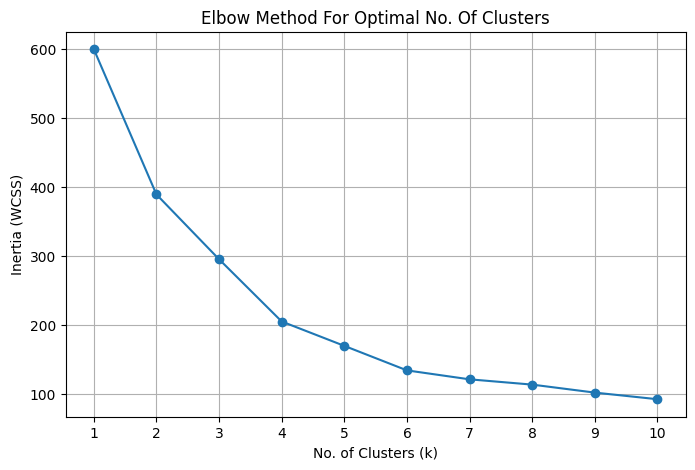

In [6]:
inertia = []
K_range = range(1, 11)

# Scale numerical features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Optimal number of clusters using Elbow method
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal No. Of Clusters')
plt.xlabel('No. of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

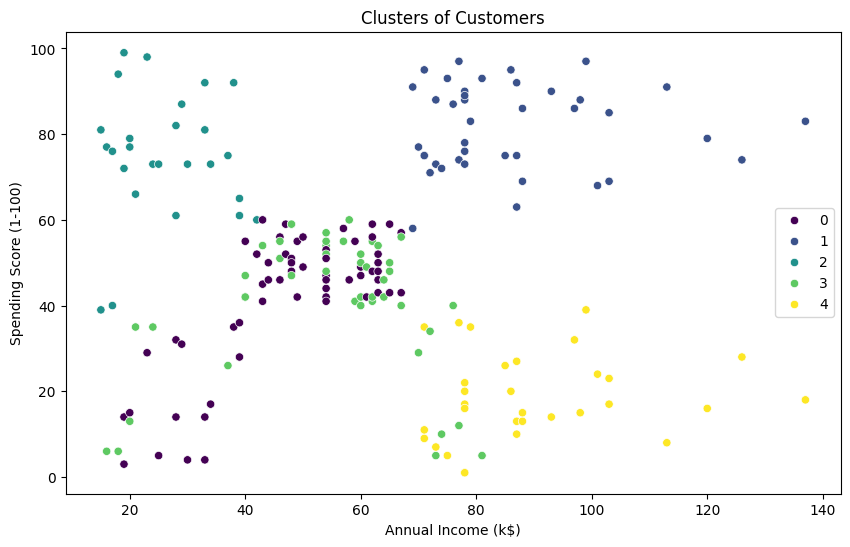

In [7]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

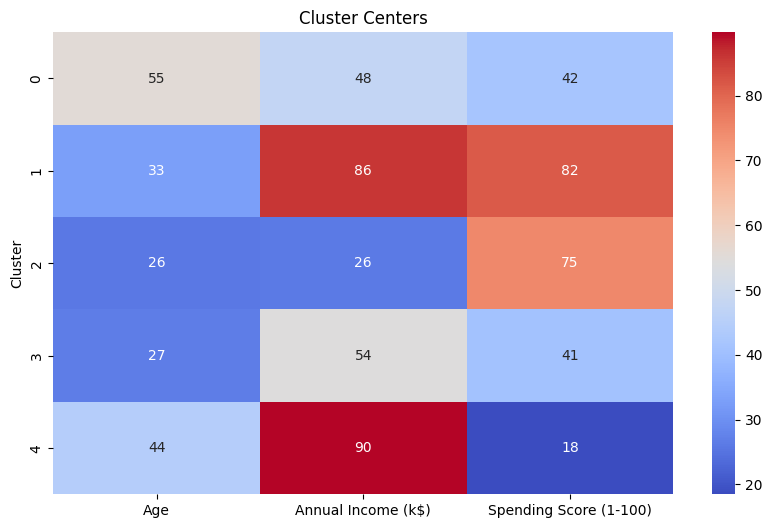

In [8]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
cluster_centers_df['Cluster'] = range(optimal_k)

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers_df.set_index('Cluster'), annot=True, cmap='coolwarm')
plt.title('Cluster Centers')
plt.show()

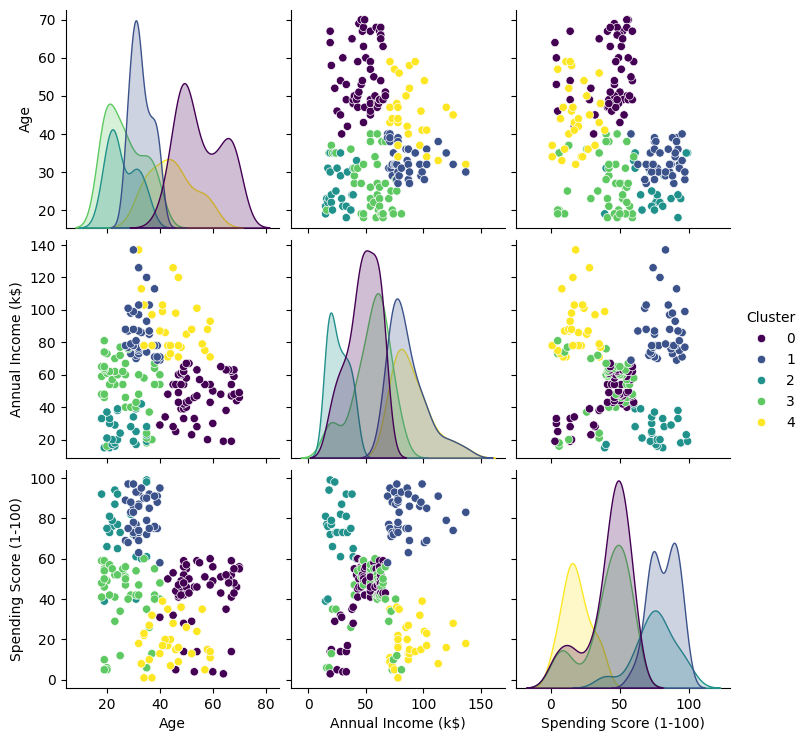

In [9]:
sns.pairplot(data, hue='Cluster', palette='viridis', vars=features)
plt.show()


In [10]:
cluster_summary = data.groupby('Cluster')[features].mean().reset_index()
print(cluster_summary)

# Save the clustered data
data.to_csv('clustered_customers.csv', index=False)

   Cluster        Age  Annual Income (k$)  Spending Score (1-100)
0        0  55.275862           47.620690               41.706897
1        1  32.875000           86.100000               81.525000
2        2  25.769231           26.115385               74.846154
3        3  26.733333           54.311111               40.911111
4        4  44.387097           89.774194               18.483871
